<a href="https://colab.research.google.com/github/rishab-gangwar/Explaining-CNNs/blob/master/fashionMnistTrain_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torchvision
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

In [ ]:
data=FashionMNIST(root='',download=True,train=False,transform=transforms.ToTensor() )

In [ ]:
batch_size=16
data_load=DataLoader(data,batch_size=batch_size,shuffle=True)



torch.Size([16, 1, 28, 28]) torch.Size([16])


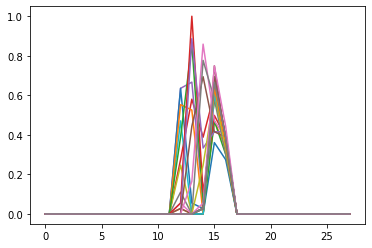

In [ ]:
data_=iter(data_load)
images,labels= data_.next()
plt.plot(images[1,0])
print(images.shape,labels.shape)

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

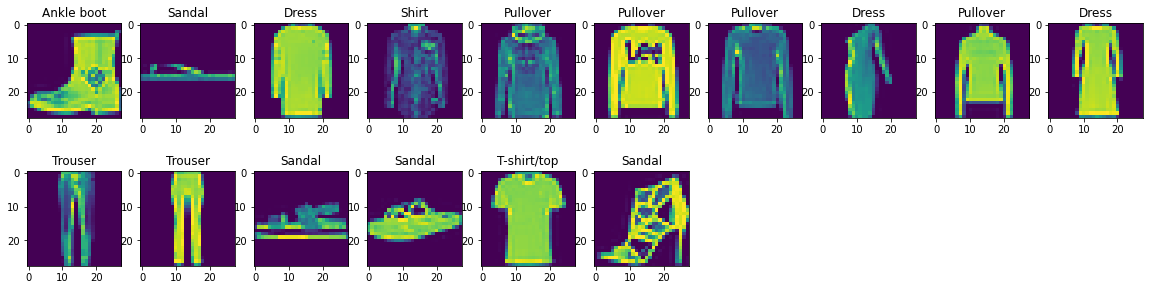

In [ ]:
images.numpy()
#plt.imshow(np.squeeze(images[3]))
fig=plt.figure(figsize=(20,5))
for i in range(16):
    ax=fig.add_subplot(2,10,i+1)
    ax.imshow(np.squeeze(images[i]))
    ax.set_title(classes[(labels[i])])

In [ ]:
pwd

'/content'

# ML

In [ ]:
import torch.nn.functional as f
class Net(nn.Module):
  def __init__(self):
    super(Net,self) .__init__()
    self.conv1=nn.Conv2d(1,10,3)#(1*28*28 -> 10*26*26)
    self.pool = nn.MaxPool2d(2,2)#(10*26*26 -> 10*13*13)
    self.conv2 = nn.Conv2d(10,20,3)#(10*13*13 -> 20*11*11)
    self.fc1=nn.Linear(20*5*5,50)
    self.fc1_drop= nn.Dropout(.4)
    self.fc2=nn.Linear(50,10)
  def forward(self,x):
    x = self.conv1(x)
    x = self.pool(f.relu(x))
    x = self.conv2(x)
    x = self.pool(f.relu(x))
    x = x.view(x.size(0),-1)
    x = self.fc1(x)
    x = self.fc1_drop(x)
    x = self.fc2(x)
    return x
  def forward_2(self, x):
        
        x = self.pool(f.relu(self.conv1(x)))
        x = self.pool(f.relu(self.conv2(x)))

       
        x = x.view(x.size(0), -1)
        y = f.relu(self.fc1(x))
        return y
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [ ]:
net = Net()

net.load_state_dict(torch.load('fashion_net_ex.pt'))

print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


First convolutional layer


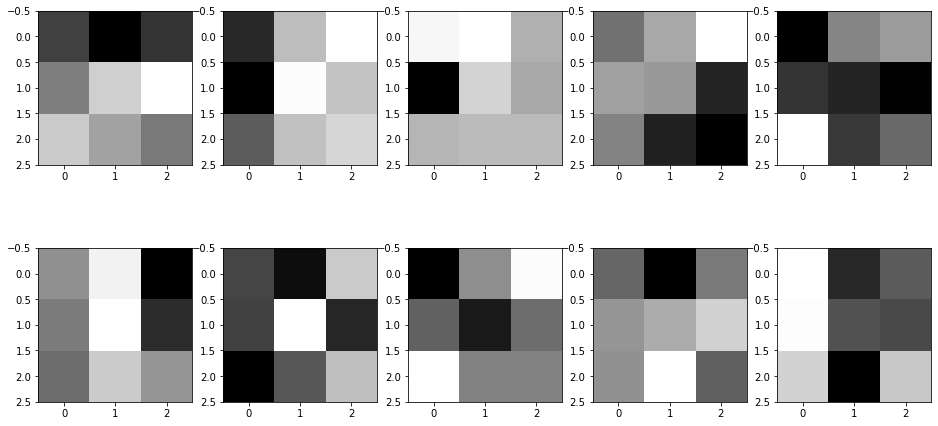

second convolutional layer


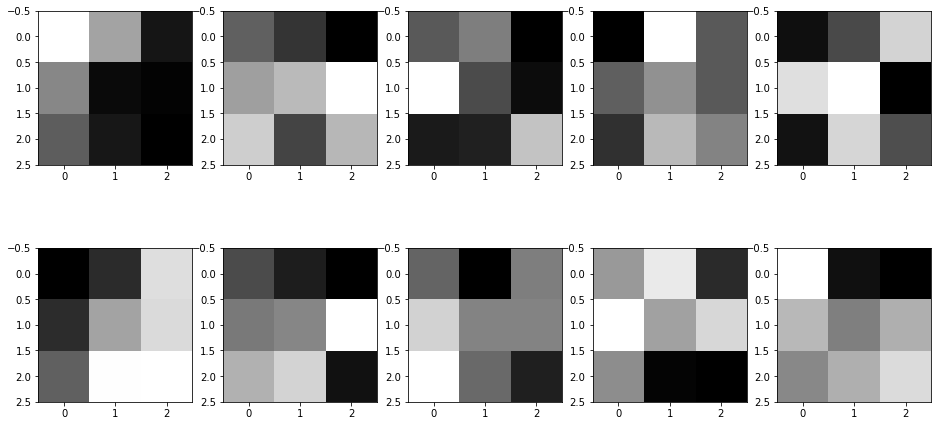

In [ ]:
weights = net.conv1.weight.data
w = weights.numpy()

fig=plt.figure(figsize=(16, 8))
columns = 5
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(w[i][0], cmap='gray')
    
print('First convolutional layer')
plt.show()

weights = net.conv2.weight.data
w = weights.numpy()
fig=plt.figure(figsize=(16, 8))
columns = 5
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(w[i][0], cmap='gray')
    
print('second convolutional layer')
plt.show()

(16, 1, 28, 28)
(28, 28)


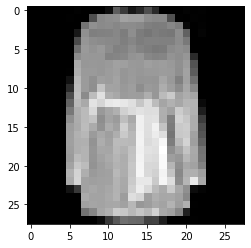

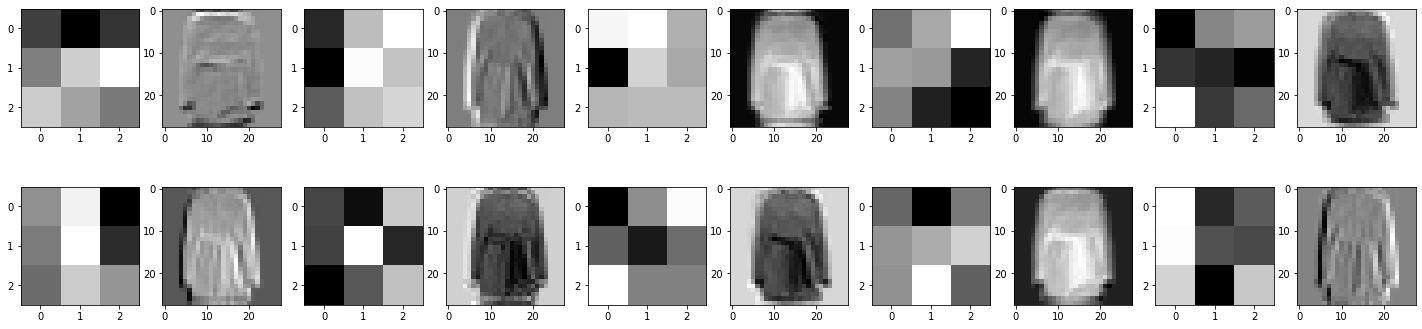

In [ ]:
dataiter = iter(data_load)
images, labels = dataiter.next()
images = images.numpy()
i=3
print(images.shape)
img = np.squeeze(images[i])
print(img.shape)

import cv2
plt.imshow(img, cmap='gray')

weights = net.conv1.weight.data
w = weights.numpy()

fig=plt.figure(figsize=(25,6))
columns = 10
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if ((i%2)==0):
        plt.imshow(w[int(i/2)][0], cmap='gray')
    else:
        c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
        plt.imshow(c, cmap='gray')
plt.show()

In [ ]:
dataiter = iter(data_load)
features = []
label = []

for images, labels in dataiter:
    x = net.pool(f.relu(net.conv1(images)))
    x = net.pool(f.relu(net.conv2(x)))

       
    x = x.view(x.size(0), -1)
    y = f.relu(net.fc1(x))
    features.append(y.data.numpy())
    label.append(labels.data.numpy())
    
features = np.asarray(features)
label = np.asarray(label)

features = features.reshape(-1,50)
print("Features" + str(features.shape))

label = label.reshape(10000,-1)
print("Labels" + str(label.shape))

Features(10000, 50)
Labels(10000, 1)


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
features_tsne = tsne.fit_transform(features)



In [44]:
named_classes = [classes[labels] for labels in np.squeeze(label)]
named_classes = [classes[labels] for labels in np.squeeze(label)]
%matplotlib inline
classes
['Ts',
 'Tr',
 'Po',
 'Ds',
 'Ct',
 'Sl',
 'Sh',
 'Sn',
 'Bg',
 'Ab']
colours = [
"#80ff00",
"#40ff00",
"#00ff00",
"#00ff40",
"#00ff80",
"#00ffbf",
"#00ffff",
"#00bfff",
"#0080ff",
"#4000ff"]
class_colour = {classes:colours for classes,colours in zip(classes,colours)}
class_colours = [class_colour[label] for label in named_classes]


In [45]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()


In [47]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for CNN features")

source = ColumnDataSource(data=dict(x1=features_tsne[1:400,0],
                                    x2=features_tsne[1:400,1],
                                    names=named_classes[1:400],
                                    color=class_colours[1:400]))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)
